### conjugate gradient descent

Assume $A$ is not only real and symmetric but also positive definite. $x^TAx>0$ for every nonzero $x \in \mathbb{R}^m$. Under this assumption, $|| \cdot||_A$ is defined by $||x||_A=\sqrt{x^TAx}$

The vector whose A-norm will concern use is $e_n = x^*-x_n$, the error at step $n$. The conjugate iteration can be described as a system of recurrence formulas that generates the unique sequence of iterates $\{x_n \in \Kappa_n \}$ with the property that at step $n$, $||e_n||_A$ is minimized. 

解线性方程组$Ax=b$，其中$A$是symmetric positive definite 等价于最小化二次函数$\varphi(x) = \frac{1}{2} x^{T}Ax-x^{T}b$, where the gradient here $\nabla \varphi(x) = Ax-b = -r$， 残差$r$就是负梯度也即下降的方向

$x_n$: approximate solution at each iteration

$r_n = b-Ax_n$: residual

$p_n$: conjugate direction, 比residual更好的下降方向，让每次下降互相不干扰，提高收敛速度

$\alpha_n$: step length, the best stepsize at current direction, 沿着$p_n$的方向最小化$\varphi(x)$

$\beta_n$: direction update coefficient. 让新的方向与旧的方向A-orthogonal

<br>

---

$x_0=0, r_0=b, p_0=r_0$

**for** $n=1, 2, 3,...$

$\quad \quad \alpha_n = \frac{r_{n-1}^{T} r_{n-1}}{p_{n-1}^TAp_{n-1}}$  //step length

$\quad \quad x_n = x_{n-1}+\alpha_n p_{n-1}$ // approximate solution

$\quad \quad r_n = r_{n-1} - \alpha_n A p_{n-1}$ //residual 

$\quad \quad \beta_n = \frac{r_n^Tr_n}{r_{n-1}^Tr_{n-1}}$ //improvement this step

$\quad \quad p_n = r_n + \beta_n p_{n-1}$ //search direction

---

#### Optimality of CG

**Theorem 38.2.** *Let the CG iteration be applied to a symmetric positive definite matrix problem $Ax = b$. If the iteration has not already converged (i.e., $r_{n-1} \neq 0$), then $x_n$ is the unique point in $\mathcal{K}_n$ that minimizes $\|e_n\|_A$. The convergence is monotonic,*

$$
\|e_n\|_A \le \|e_{n-1}\|_A, \tag{38.6}
$$

*and $e_n = 0$ is achieved for some $n \le m$.*

*Proof.* From Theorem 38.1 we know that $x_n$ belongs to $\mathcal{K}_n$. To show that it is the unique point in $\mathcal{K}_n$ that minimizes $\|e\|_A$, consider an arbitrary point $x = x_n - \Delta x \in \mathcal{K}_n$, with error $e = x_* - x = e_n + \Delta x$. We calculate

$$
\begin{aligned}
\|e\|_A^2 &= (e_n + \Delta x)^T A (e_n + \Delta x) \\
&= e_n^T A e_n + (\Delta x)^T A (\Delta x) + 2e_n^T A (\Delta x).
\end{aligned}
$$

The final term in this equation is $2r_n^T(\Delta x)$, an inner product of $r_n$ with a vector in $\mathcal{K}_n$, and by Theorem 38.1, any such inner product is zero. This is the crucial orthogonality property that makes the CG iteration so powerful. It implies that we have

$$
\|e\|_A^2 = e_n^T A e_n + (\Delta x)^T A (\Delta x).
$$

Only the second of these terms depends on $\Delta x$, and since $A$ is positive definite, that term is $\ge 0$, attaining the value 0 if and only if $\Delta x = 0$, i.e., $x_n = x$. Thus $\|e\|_A$ is minimal if and only if $x_n = x$, as claimed.

### optimization perspective:

By a succession of core update operation $x_n = x_{n-1}+\alpha_n p_{n-1}$, conjugate gradient attempts to find a minimum of a nonlinear function. 是哪一个nonlinear function呢？直觉上肯定是$||e_n||_A^2$, 但直接看的话$||e_n||_A^2$是跟$x*$这个不到最后一刻不知道的var相关。需要稍微转换一下

$||e_n||_A^2 = e_n^TAe_n = (x^*-x_n)^{T}A(x^*-x_n)$

$\quad \quad= x_n^TAx_n - 2x_n^TAx^*+(x^*)^{T}Ax^*$

$ \quad \quad x_n^TAx_n - 2x_n^Tb+(x^*)^{T}b$

$\quad \quad 2 \varphi(x) + Constant $

所以$||e_n||_A^2$ 以及 quadratic function $\varphi(x)$ 同时达到min的地方

Also, what makes CG remarkable is the choice of search direction $p_{n-1}$, which has the special property that minimizing $\varphi(x)$ over $x_{n-1}+<p_{n-1}>$ actually minimizes it over all of $\mathcal{K}_n$

CG解$Ax=b$以及Lanczos iteration找eigenvalue都是在不断扩大的子空间里寻找最优解(通过找目标函数的stationary point), 之前的Lanczos iteration的目标函数是Rayleigh Quotient $r(x)=\frac{x^{T}Ax}{x^{T}x}$，CG的目标函数是$\varphi(x) = \frac{1}{2} x^{T}Ax-x^{T}b$

### Polynomial

### Rate of convergence

The rate of convergence of CG is determined by the location of the sepctrum of $A$. 


Let $A$ be the $100 \times 100$ tridiagonal symmetric matrix with diagonal entries $1, 2, \ldots, 100$ and entries of $1$ on the sub- and super-diagonals. Set $b = (1, 1, \ldots, 1)^T$.

Write a program that performs 100 steps of both the Conjugate Gradient (CG) method and the Steepest Descent iteration to approximately solve the system $Ax = b$.

Required Output:

Produce a single plot containing the following four curves:

CG (Computed): The computed residual norms $\|r_n\|_2$.

CG (Actual): The actual residual norms $\|b - Ax_n\|_2$.

Steepest Descent: The residual norms $\|r_n\|_2$.

Theoretical Estimate: The convergence estimate from Theorem 38.5:

$$2 \left( \frac{\sqrt{\kappa} - 1}{\sqrt{\kappa} + 1} \right)^n$$

(Where $\kappa$ is the condition number of $A$).

/var/folders/wl/tst5j8ss72n81nsz8b26y1f40000gn/T/ipykernel_22933/3211678900.py:29: RuntimeWarning: divide by zero encountered in matmul
  r_sd = b - A @ x_sd
/var/folders/wl/tst5j8ss72n81nsz8b26y1f40000gn/T/ipykernel_22933/3211678900.py:29: RuntimeWarning: overflow encountered in matmul
  r_sd = b - A @ x_sd
/var/folders/wl/tst5j8ss72n81nsz8b26y1f40000gn/T/ipykernel_22933/3211678900.py:29: RuntimeWarning: invalid value encountered in matmul
  r_sd = b - A @ x_sd
/var/folders/wl/tst5j8ss72n81nsz8b26y1f40000gn/T/ipykernel_22933/3211678900.py:37: RuntimeWarning: divide by zero encountered in matmul
  Ar_sd = A @ r_sd
/var/folders/wl/tst5j8ss72n81nsz8b26y1f40000gn/T/ipykernel_22933/3211678900.py:37: RuntimeWarning: overflow encountered in matmul
  Ar_sd = A @ r_sd
/var/folders/wl/tst5j8ss72n81nsz8b26y1f40000gn/T/ipykernel_22933/3211678900.py:37: RuntimeWarning: invalid value encountered in matmul
  Ar_sd = A @ r_sd
/var/folders/wl/tst5j8ss72n81nsz8b26y1f40000gn/T/ipykernel_22933/3211678900

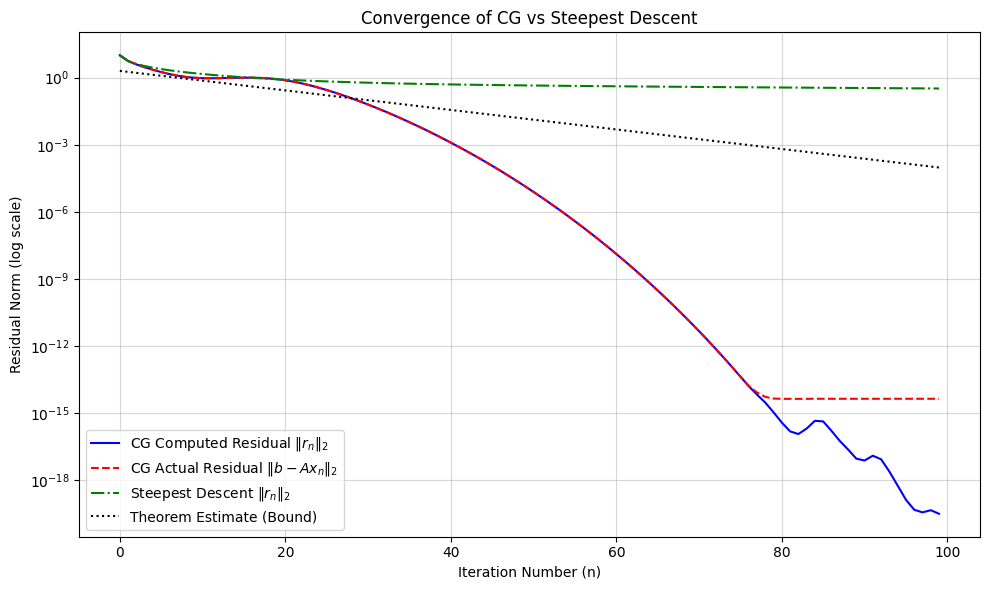

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def solve_system():
    # 1. Setup Matrix A and vector b
    n = 100
    # Diagonal entries 1 to 100
    diag = np.arange(1, n + 1, dtype=float)
    # Sub/Super-diagonal entries of 1
    off_diag = np.ones(n - 1, dtype=float)
    
    # Create the tridiagonal matrix A
    A = np.diag(diag) + np.diag(off_diag, k=1) + np.diag(off_diag, k=-1)
    
    # Vector b (all ones)
    b = np.ones(n, dtype=float)
    
    # Initial guess x0 (zero vector)
    x0 = np.zeros(n, dtype=float)
    
    # Number of steps
    steps = 100
    
    # --- Steepest Descent (SD) ---
    x_sd = x0.copy()
    sd_residuals = []
    
    # Initial residual for SD
    r_sd = b - A @ x_sd
    
    for _ in range(steps):
        # Store norm
        sd_residuals.append(np.linalg.norm(r_sd))
        
        # Calculate step size alpha
        # alpha = (r^T r) / (r^T A r)
        Ar_sd = A @ r_sd
        rTr = np.dot(r_sd, r_sd)
        alpha = rTr / np.dot(r_sd, Ar_sd)
        
        # Update x
        x_sd = x_sd + alpha * r_sd
        
        # Recalculate residual strictly as b - Ax to avoid drift in SD implementation,
        # though standard SD often updates r recursively. 
        # Here we recalculate to ensure accuracy of the method itself.
        r_sd = b - A @ x_sd

    # --- Conjugate Gradient (CG) ---
    x_cg = x0.copy()
    r_cg = b - A @ x_cg
    p_cg = r_cg.copy()
    
    cg_computed_residuals = []
    cg_actual_residuals = []
    
    for _ in range(steps):
        # Store current residuals before update
        # 1. Computed residual norm (the r vector tracked in the loop)
        cg_computed_residuals.append(np.linalg.norm(r_cg))
        
        # 2. Actual residual norm (b - Ax)
        actual_res = b - A @ x_cg
        cg_actual_residuals.append(np.linalg.norm(actual_res))
        
        # CG Iteration
        Ap = A @ p_cg
        rTr = np.dot(r_cg, r_cg)
        
        # Alpha step size
        alpha = rTr / np.dot(p_cg, Ap)
        
        # Update x
        x_cg = x_cg + alpha * p_cg
        
        # Update r (Computed residual)
        r_cg_new = r_cg - alpha * Ap
        
        # Beta step size
        beta = np.dot(r_cg_new, r_cg_new) / rTr
        
        # Update search direction p
        p_cg = r_cg_new + beta * p_cg
        
        # Move to next r
        r_cg = r_cg_new

    # --- Theoretical Estimate ---
    # Condition number kappa = lambda_max / lambda_min
    # Since A is symmetric positive definite (eigenvalues approx 1 to 100), we compute them.
    eigvals = np.linalg.eigvalsh(A)
    lambda_max = np.max(eigvals)
    lambda_min = np.min(eigvals)
    kappa = lambda_max / lambda_min
    
    # Theorem 38.5 Estimate: 2 * ((sqrt(k)-1)/(sqrt(k)+1))^n
    factor = (np.sqrt(kappa) - 1) / (np.sqrt(kappa) + 1)
    estimate = [2 * (factor ** i) for i in range(steps)]
    
    # --- Plotting ---
    plt.figure(figsize=(10, 6))
    
    # We use a semi-log Y scale to see convergence rates clearly
    plt.semilogy(range(steps), cg_computed_residuals, 'b-', label='CG Computed Residual $\|r_n\|_2$')
    plt.semilogy(range(steps), cg_actual_residuals, 'r--', label='CG Actual Residual $\|b - Ax_n\|_2$')
    plt.semilogy(range(steps), sd_residuals, 'g-.', label='Steepest Descent $\|r_n\|_2$')
    plt.semilogy(range(steps), estimate, 'k:', label='Theorem Estimate (Bound)')
    
    plt.title('Convergence of CG vs Steepest Descent')
    plt.xlabel('Iteration Number (n)')
    plt.ylabel('Residual Norm (log scale)')
    plt.grid(True, which="both", ls="-", alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    solve_system()

CG vs. Steepest Descent: CG converges dramatically faster than steepest descent here. By $\approx 60$ iterations, the CG true residual is already below $10^{-8}$. Steepest descent shows very slow reduction because its convergence depends directly on the condition number; for large $\kappa$, steepest descent is very inefficient.

Theoretical Bound (Theorem 38.5): The bound (often plotted as a yellow dotted curve) is conservative: it decays much more slowly than the observed CG residual. This is typical — the theorem gives a worst-case upper bound valid for any initial vector and spectrum in $[\lambda_{\min},\lambda_{\max}]$. In practice, eigenvalue clustering or favorable structure leads to faster convergence.

Computed vs. True Residual: The CG algorithm residual (the vector $r$ updated in the recurrence) and the true residual ($b-Ax$) coincide in exact arithmetic. However, due to floating point arithmetic, they begin to differ at very small residuals. In the run, you can see true residual stagnation near machine precision, while the recurrence residual may continue to show smaller values or small oscillations. This is why monitoring the true residual (explicit $b-Ax$) is often recommended in practice.

Finite Termination: Note that CG (in exact arithmetic) finds the exact solution in at most $n$ steps for an $n \times n$ SPD matrix. Here we ran 100 steps and see near-machine-precision accuracy achieved well before 100 iterations.

### Precondition

让原本GMRES或者CG迭代求解$Ax=b$更加容易一些。